In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Silakan memilih hasil model dari saham yang diinginkan

dataset = pd.read_excel("SMGR_neural_result.xlsx")
#dataset = pd.read_excel("SMGR_SVM_result.xlsx")
#dataset = pd.read_excel("UNVR_Neural_result.xlsx")
#dataset = pd.read_excel("UNVR_SVM_result.xlsx")
#dataset = pd.read_excel("INDF_neural_result.xlsx")
#dataset = pd.read_excel("INDF_SVM_result.xlsx")
#dataset = pd.read_excel("ASII_neural_result.xlsx")
#dataset = pd.read_excel("ASII_SVM_result.xlsx")
dataset.head(30)

C:\Users\SONY\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Last Date in window,Open - 0,High - 0,Low - 0,Close - 0,Adj Close - 0,Volume - 0,prediction(Close + 1 (horizon))
0,2020-12-03,11950.0,12000.0,11800.0,12000.0,11781.68066,3309800.0,10496.109321
1,2020-12-04,12000.0,12000.0,11600.0,11675.0,11462.59375,3230000.0,10467.269568
2,2020-12-07,11850.0,11900.0,11700.0,11750.0,11536.22949,6570000.0,10475.122882
3,2020-12-08,11750.0,11850.0,11500.0,11575.0,11364.41309,4079000.0,10437.268304
4,2020-12-10,11575.0,11875.0,11575.0,11700.0,11487.13867,6911900.0,10453.542517
5,2020-12-11,11775.0,11775.0,11450.0,11475.0,11266.23242,4186300.0,10423.076214
6,2020-12-14,11550.0,12000.0,11550.0,12000.0,11781.68066,9498000.0,10486.767630
7,2020-12-15,12000.0,12275.0,11650.0,12250.0,12027.13281,5212500.0,10525.818754
8,2020-12-16,12350.0,12800.0,12350.0,12600.0,12370.76465,10956900.0,10613.482894
9,2020-12-17,12700.0,13000.0,12675.0,12925.0,12689.85254,8374600.0,10642.728013


In [96]:
dataset.drop(['Open - 0', 'High - 0', 'Low - 0', 'Adj Close - 0', 'Volume - 0'], axis=1, inplace=True)

In [97]:
dataset

,Last Date in window,Close - 0,prediction(Close + 1 (horizon))
0,2020-12-03,12000.0,10496.109321
1,2020-12-04,11675.0,10467.269568
2,2020-12-07,11750.0,10475.122882
3,2020-12-08,11575.0,10437.268304
4,2020-12-10,11700.0,10453.542517
...,...,...,...
295,2022-02-16,7400.0,7361.207024
296,2022-02-17,7325.0,7270.338276
297,2022-02-18,7350.0,7277.677073
298,2022-02-21,7275.0,7240.332586


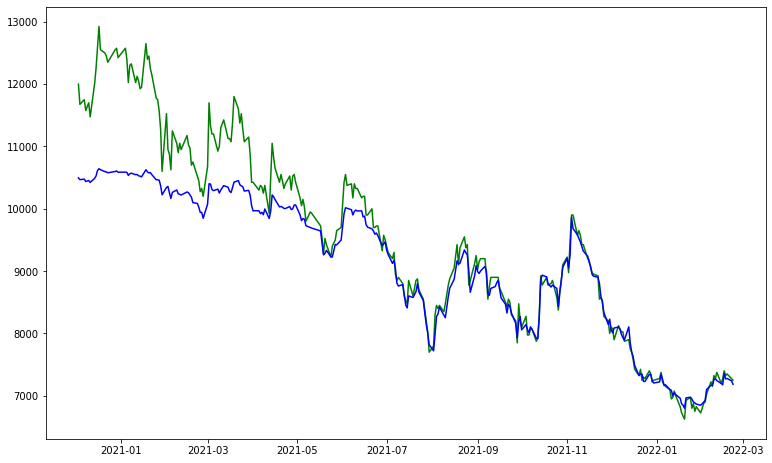

In [98]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([1,1,1,1])

ax1.plot(dataset['Last Date in window'], dataset['Close - 0'], color = 'green')
ax1.plot(dataset['Last Date in window'], dataset['prediction(Close + 1 (horizon))'], color = 'blue')
plt.show()

In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = dataset['Close - 0']
y_pred = dataset['prediction(Close + 1 (horizon))']

mean_absolute_percentage_error(y_true, y_pred)

3.6572687579843555